In [1]:
# plot_hardcode
# import lib
# ===========================================================
import csv
import pandas as pd
from datascience import *
import numpy as np
import random
import time
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import collections
import math
import sys
from tqdm import tqdm
from time import sleep

In [2]:
# Logistic Regression
LR_CUTOFF = np.arange(0, 1 + 0.05, 0.05)
LR_ACC = np.array([0.5  , 0.546, 0.568, 0.59 , 0.594, 0.6  , 0.594, 0.578, 0.578,
       0.596, 0.61 , 0.598, 0.584, 0.572, 0.564, 0.55 , 0.552, 0.554,
       0.546, 0.54 , 0.5  ])
LR_FPR = np.array([1.   , 0.84 , 0.76 , 0.672, 0.628, 0.588, 0.556, 0.548, 0.516,
       0.456, 0.404, 0.372, 0.34 , 0.324, 0.3  , 0.276, 0.232, 0.184,
       0.104, 0.048, 0.   ])
LR_TPR = np.array([1.   , 0.932, 0.896, 0.852, 0.816, 0.788, 0.744, 0.704, 0.672,
       0.648, 0.624, 0.568, 0.508, 0.468, 0.428, 0.376, 0.336, 0.292,
       0.196, 0.128, 0.   ])

# Decision Tree
DT_CUTOFF = np.arange(0, 1 + 0.05, 0.05)
DT_ACC = np.array([0.49974747, 0.56691919, 0.58813131, 0.60368687, 0.60368687,
       0.60368687, 0.60368687, 0.60368687, 0.62378788, 0.62378788,
       0.62378788, 0.62378788, 0.62378788, 0.6309596 , 0.6309596 ,
       0.5030303 , 0.5030303 , 0.5030303 , 0.49959596, 0.49959596,
       0.50025253])

DT_FPR = np.array([1.        , 0.83281171, 0.73255931, 0.69156991, 0.69156991,
       0.69156991, 0.69156991, 0.69156991, 0.4503786 , 0.4503786 ,
       0.4503786 , 0.4503786 , 0.4503786 , 0.24967188, 0.24967188,
       0.03705199, 0.03705199, 0.03705199, 0.01373044, 0.01373044,
       0.        ])
DT_TPR = np.array([1.        , 0.96705407, 0.90914603, 0.89924204, 0.89924204,
       0.89924204, 0.89924204, 0.89924204, 0.69802931, 0.69802931,
       0.69802931, 0.69802931, 0.69802931, 0.51147044, 0.51147044,
       0.0426478 , 0.0426478 , 0.0426478 , 0.01243052, 0.01243052,
       0.        ])

# Random Forest
RF_CUTOFF = np.arange(0, 1 + 0.05, 0.05)
RF_ACC = np.array([0.50020202, 0.50020202, 0.50040404, 0.50787879, 0.53449495,
       0.56217172, 0.58393939, 0.61020202, 0.64343434, 0.67575758,
       0.68464646, 0.67070707, 0.6379798 , 0.58712121, 0.5370202 ,
       0.50757576, 0.50005051, 0.49974747, 0.49979798, 0.49979798,
       0.49979798])

RF_FPR = np.array([1.00000000e+00, 1.00000000e+00, 9.99595796e-01, 9.84033953e-01,
       9.28556993e-01, 8.67825384e-01, 8.14167340e-01, 7.39894907e-01,
       6.29951496e-01, 4.84033953e-01, 3.53678254e-01, 2.43835893e-01,
       1.54203719e-01, 7.97291835e-02, 2.84963622e-02, 6.16410671e-03,
       8.08407437e-04, 1.01050930e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])

RF_TPR = np.array([1.        , 1.        , 1.        , 0.99939418, 0.99717286,
       0.99182149, 0.98172456, 0.96001616, 0.91659935, 0.83542003,
       0.72294023, 0.58531906, 0.43033118, 0.25424071, 0.10288772,
       0.0217084 , 0.0013126 , 0.        , 0.        , 0.        ,
       0.        ])

# Adaboost
AD_CUTOFF = np.arange(0, 1 + 0.05, 0.05)
AD_ACC = np.array([0.50075 , 0.571063, 0.585625, 0.57625 , 0.616688, 0.652   ,
       0.652875, 0.661563, 0.641375, 0.651813, 0.623125, 0.606563,
       0.575937, 0.62875 , 0.623625, 0.644437, 0.603125, 0.591187,
       0.499125, 0.493125, 0.500625])

AD_FPR = np.array([0.0017452006980781037,
 0.01959071624654406,
 0.021771037181969457,
 0.12116296481142855,
 0.16745695033670147,
 0.21425006239054872,
 0.2968555028696071,
 0.34560378062387065,
 0.3486398802091981,
 0.3742201147986346,
 0.3843181251553424,
 0.41290242076314837,
 0.41677065135959973,
 0.4293735962061026,
 0.5103842805614844,
 0.5154729223851816,
 0.6032831737338599,
 0.7298843427425322,
 0.7780126849884617,
 0.800522323093147,
 0.9999999999987522])

AD_TPR = np.array([0.0005013787916764836,
 0.0015337423312863834,
 0.004132231404953503,
 0.30252942649598985,
 0.37290257951368283,
 0.4482844978707134,
 0.5026296018025261,
 0.5616078136732261,
 0.6306091752310973,
 0.6317305284239523,
 0.6513381078016693,
 0.6997245179054599,
 0.7332832456790217,
 0.7362885048826242,
 0.7632106185815637,
 0.8160572936288277,
 0.8389244879999511,
 0.9043849729854198,
 0.9237341374532935,
 0.956904133683934,
 0.9999999999987478])

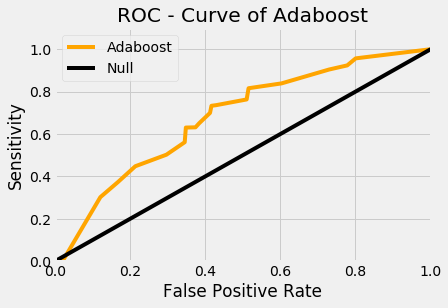

In [54]:
# ROC_CURVE
# ===========================================================
fig = plt.figure()
plt.xlabel('False Positive Rate')
plt.ylabel('Sensitivity')
plt.title('ROC - Curve of Adaboost')
plt.plot(AD_FPR, AD_TPR, color='orange')
plt.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1), color='black')
plt.legend(['Adaboost', 'Null'])
plt.axis([0, 1, 0, 1.1])
plt.show()
fig.savefig('Adaboost ROC.png', bbox_inches='tight')

In [56]:
# Compute AUC
# ===========================================================
length = len(AD_FPR)
auc = 0
for i in range(length - 1):
    auc += 0.5 * abs(AD_FPR[i + 1] - AD_FPR[i]) * (AD_TPR[i] + AD_TPR[i + 1])
print("auc = %.03f" %auc)

auc = 0.679


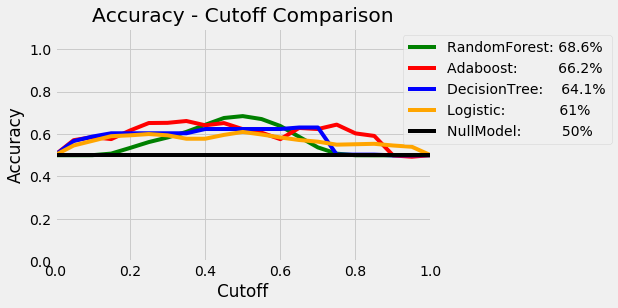

In [5]:
# Acc Curve by cutoff
# ===========================================================
# matplotlib.use('TkAgg')
fig = plt.figure()
plt.xlabel('Cutoff')
plt.ylabel('Accuracy')
plt.title('Accuracy - Cutoff Comparison')
plt.plot(RF_CUTOFF, RF_ACC, color='green')
plt.plot(AD_CUTOFF, AD_ACC, color='red')
plt.plot(DT_CUTOFF, DT_ACC, color='blue')
plt.plot(LR_CUTOFF, LR_ACC, color='orange')
plt.plot(np.arange(0, 1.1, 0.1), [0.5 for i in np.arange(0, 1.1, 0.1)], color='black')
plt.axis([0, 1, 0, 1.1])
plt.legend(['RandomForest: 68.6%', 'Adaboost:         66.2%', 'DecisionTree:    64.1%', 'Logistic:            61%', 'NullModel:         50%'], loc='best', bbox_to_anchor=(0.5, 0.5, 1, 0.5))
plt.show()
fig.savefig('Accuracy - Cutoff Comparison.png', bbox_inches='tight')

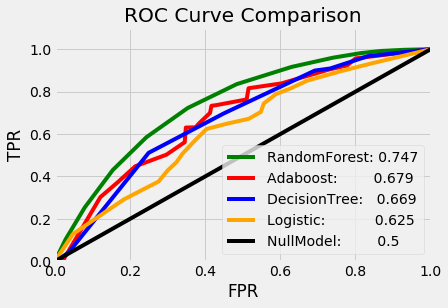

In [6]:
# ROC Curve
# ===========================================================
# matplotlib.use('TkAgg')
fig = plt.figure()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve Comparison')
plt.plot(RF_FPR, RF_TPR, color='green')
plt.plot(AD_FPR, AD_TPR, color='red')
plt.plot(DT_FPR, DT_TPR, color='blue')
plt.plot(LR_FPR, LR_TPR, color='orange')
plt.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1), color='black')
plt.axis([0, 1, 0, 1.1])
plt.legend(['RandomForest: 0.747', 'Adaboost:        0.679', 'DecisionTree:   0.669', 'Logistic:           0.625', 'NullModel:        0.5'])
plt.show()
fig.savefig('ROC Curve Comparison.png', bbox_inches='tight')